In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error
from sklearn.metrics import confusion_matrix

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Dense, Input

In [6]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [7]:
# from tensorflow.keras.layers import RandomFourierFeatures

In [8]:
import seaborn as sns

In [9]:
df = pd.read_csv('../../dados/historico de demanda.csv', delimiter=";")

In [10]:
df['COD435-2'] = df['COD435'] ** 2

In [11]:
df['COD426-2'] = df['COD426'] ** 2

In [12]:
df['COD470-2'] = df['COD470'] ** 2

In [13]:
df['COD476-2'] = df['COD476'] ** 2

In [14]:
# sns.pairplot(df, diag_kind="kde")

In [15]:
df["COD435"] = df["COD435"].fillna(0)
df["COD426"] = df["COD426"].fillna(0)
df["COD470"] = df["COD470"].fillna(0)
df["COD476"] = df["COD476"].fillna(0)

In [16]:
# X = df[['COD426', 'COD435', 'COD470']]
X = df[['COD476', 'COD470', 'COD435']]
Y = df['COD426']

In [17]:
# dados = dados[dados['demanda'] > 10]

In [18]:
# X = X.fillna(0)
# Y = Y.fillna(0)

In [19]:
losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
          'cosine_similarity', 'huber', 'log_cosh']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [21]:
# lin_space = np.linspace(0, 100, len(df['COD476']))

In [22]:
# d = {'NAN': 0}
# for value in Y['COD476']:
#     if pd.isna(value):
#         d['NAN'] += 1
#     elif value in d:
#         d[value] += 1
#     else:
#         d[value] = 1
# d

In [23]:
# X.shape

In [24]:
model = Sequential()
model.add(Input((3, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [25]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# x_train = x_train.reshape(-1, 784).astype("float32") / 255
# x_test = x_test.reshape(-1, 784).astype("float32") / 255

In [61]:
def execute_model(optimizer, loss_name, epochs=50):
    model.compile(optimizer=optimizer, loss=loss_name, metrics=['accuracy'])
    hist = model.fit(X_train, Y_train, epochs=epochs)
    evaluate = model.evaluate(X_test, Y_test, return_dict=True)
    return {"evaluate": evaluate, "history": hist}

In [66]:
losses_history['huber'] = execute_model(Adam(learning_rate = 0.001), 'huber', 50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.7073
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.6206 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.8562 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9032 - loss: 0.5821 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8998 - loss: 0.6811 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.9365
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8889 - loss: 0.7282
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8912 - loss: 0.6861
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - loss: 0.5873
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8904 - loss: 0.7471
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.6126
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 

In [64]:
# losses_history = {}
# for loss_name in losses:
#     execute_model(Adam(learning_rate = 0.001), loss_name, 50)

In [63]:
# print(loss_values['history'].history)

Acuracias: 
mean_squared_error - 0.016393441706895828
mean_absolute_error - 0.016393441706895828
mean_absolute_percentage_error - 0.01092896144837141
mean_squared_logarithmic_error - 0.01092896144837141
cosine_similarity - 0.005464480724185705
huber - 0.8961748480796814
log_cosh - 0.0


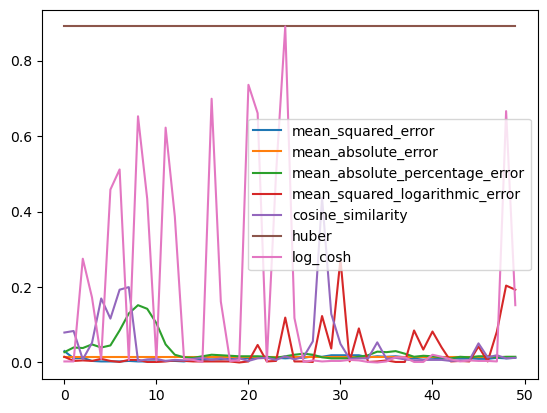

Erros: 
mean_squared_error - 0.016393441706895828
mean_absolute_error - 0.016393441706895828
mean_absolute_percentage_error - 0.01092896144837141
mean_squared_logarithmic_error - 0.01092896144837141
cosine_similarity - 0.005464480724185705
huber - 0.8961748480796814
log_cosh - 0.0


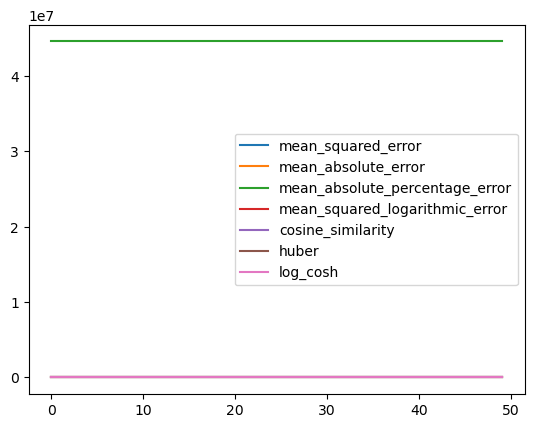

In [67]:
print("Acuracias: ")
for loss_name in losses_history:
    loss_values = losses_history[loss_name]
    if loss_values is not None: 
        print(loss_name, '-', loss_values['evaluate']['accuracy'])
        acc = loss_values['history'].history['accuracy']
        x = np.arange(0, len(acc))
        plt.plot(x, acc, label=loss_name)
plt.legend()
plt.show()

print("Erros: ")
for loss_name in losses_history:
    loss_values = losses_history[loss_name]
    if loss_values is not None: 
        print(loss_name, '-', loss_values['evaluate']['accuracy'])
        loss = loss_values['history'].history['loss']
        x = np.arange(0, len(acc))
        plt.plot(x, loss, label=loss_name)
plt.legend()
plt.show()

In [28]:
# y_prediction = model.predict(X_test)

# #Create confusion matrix and normalizes it over predicted (columns)
# result = confusion_matrix(Y_test, y_prediction , normalize='pred')
# result

In [29]:
# clf = svm.SVR(C=1, kernel='linear', degree=8, gamma='scale', coef0=10)
# clf = ElasticNet(max_iter=10000)
# clf.fit(X_train, y_train)

In [30]:
# clf.score(X_test, y_test)

In [31]:
# predictions = clf.predict(X_test)
# print(f'Model fit results:\n'
#       f'r2_score {r2_score(y_test, predictions)} \t MSE {mean_squared_error(y_test, predictions)}'
#       f'\tEVS {explained_variance_score(y_test, predictions)} \n MAE {mean_absolute_error(y_test, predictions)}'
#       f'\tMAD {median_absolute_error(y_test, predictions)}\t ME {max_error(y_test, predictions)}')

In [32]:
def create_model(approach):

    model = tf.keras.Sequential()
    model.add(tf.keras.Input((3,)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    #model.add(tf.keras.layers.Dense(128, activation='relu'))
    # model.add(tf.keras.layers.Dense(64, activation='relu'))
    # model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(20, 
                                    kernel_regularizer = tf.keras.regularizers.l2(0.01), 
                                    activation='softmax')) 
    

    model.compile(
        optimizer = 'adam',
        loss = 'CosineSimilarity',
        metrics=['accuracy'],
    )

    return model

In [33]:
def test():
    approach = 'kernel_regularizer'
    model = create_model(approach)
    start = time.time()
    history = model.fit(X_train, Y_train, epochs=30, batch_size=128, validation_split=0.2)
    print(f'Training time {approach} : {time.time() - start} sec')
    #print(f'Trainable params {approach} : {count_params(model.trainable_weights)}')
    print(f'Accuracy on x_test {approach} : {model.evaluate(X_test, Y_test, verbose=2)[1]}')


    df = pd.DataFrame(history.history).rename_axis('epoch').reset_index().melt(id_vars=['epoch'])
    fig, axes = plt.subplots(1,2, figsize=(18,6))
    for ax, mtr in zip(axes.flat, ['loss', 'accuracy']):
        ax.set_title(f'{approach} {mtr.title()} Plot')
        dfTmp = df[df['variable'].str.contains(mtr)]
        sns.lineplot(data=dfTmp, x='epoch', y='value', hue='variable', ax=ax)

    fig.tight_layout()
    plt.show()